# Data Exploration and Discovery

Data consists of two time series: telemetry and events. Telemetry describes measurements on the equipment. Events log activity on the equipment.

## Loading and Preprocessing

In [1]:
%cd ../..
from src.data.files import Data
import pandas as pd

/Users/legross/Code/marching-penguin


In [2]:
events = Data.get_events()
tel = Data.get_telemetry()

## Telemetery Data

Telemetry data points convey the equipment model, ID, and physical properties of a machine at a given time-stamp.

In [3]:
tel.head(3)

,datetime,machineID,volt,rotate,pressure,vibration,model,age,anomaly
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,False
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,False
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,False


The data point identify machines with integers between 1 and 100.

In [4]:
tel.describe()

,machineID,volt,rotate,pressure,vibration,age
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007,11.330000
std,28.866087,15.509114,52.673886,11.048679,5.370361,5.827619
min,1.000000,97.333604,138.432075,51.237106,14.877054,0.000000
25%,25.750000,160.304927,412.305714,93.498181,36.777299,6.750000
50%,50.500000,170.607338,447.558150,100.425559,40.237247,12.000000
75%,75.250000,181.004493,482.176600,107.555231,43.784938,16.000000
max,100.000000,255.124717,695.020984,185.951998,76.791072,20.000000


Distribution of physical measurements.

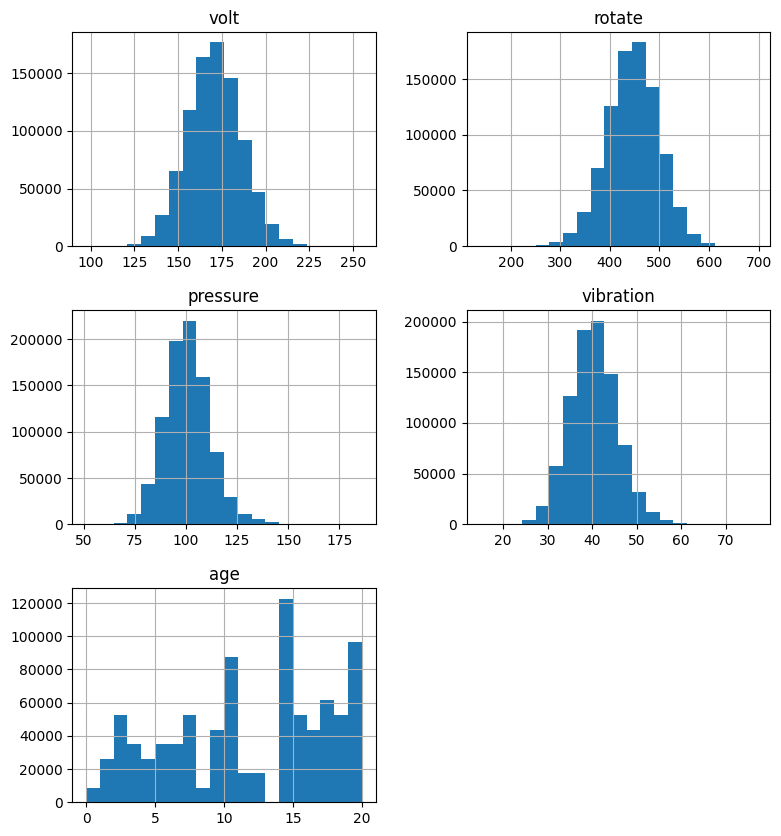

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 10]
tel.iloc[:, 2:].hist(bins=20)
plt.show()

## Events Data

Events data contains one-hot encodings for failure component, maintenance component, errors 1 through 5, and whether there is a failure, maintenance, error, or anomaly.

In [6]:
events.head(3)

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,failure,maint,error,anomaly
0,2015-01-01 06:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
1,2015-01-01 07:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False
2,2015-01-01 08:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False


Failures will have an associated component. They may cooccur with maintenance on a component.

In [7]:
events.loc[events["failure"] == True].head(3)

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,failure,maint,error,anomaly
96,2015-01-05 06:00:00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,True,True,False,True
1536,2015-03-06 06:00:00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,True,True,False,True
2616,2015-04-20 06:00:00,1,0,1,0,0,0,1,0,0,0,0,0,0,0,True,True,False,True


Anomaly signifies an error, but not necessairly a failure.

In [8]:
events.loc[events["anomaly"] == True].head(3)

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,failure,maint,error,anomaly
49,2015-01-03 07:00:00,1,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,True,True
62,2015-01-03 20:00:00,1,0,0,0,0,0,0,0,0,0,0,1,0,0,False,False,True,True
72,2015-01-04 06:00:00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True,True


Total number of failures by type:

In [9]:
events.iloc[:, 2:6].sum()

failure_comp1    192
failure_comp2    259
failure_comp3    131
failure_comp4    179
dtype: int64

Failures and errors co-occurences

In [10]:
failures_and_errors = events.iloc[:, [2,3,4,5,10,11,12,13,14]].astype(int)
cooc = failures_and_errors.T.dot(failures_and_errors)
cooc

,failure_comp1,failure_comp2,failure_comp3,failure_comp4,error1,error2,error3,error4,error5
failure_comp1,192,9,5,6,1,0,0,0,1
failure_comp2,9,259,4,14,0,0,1,0,0
failure_comp3,5,4,131,4,0,0,0,0,0
failure_comp4,6,14,4,179,1,0,0,0,0
error1,1,0,0,1,1010,12,12,4,7
error2,0,0,0,0,12,988,256,4,14
error3,0,1,0,0,12,256,838,5,14
error4,0,0,0,0,4,4,5,727,4
error5,1,0,0,0,7,14,14,4,356


Note: Multiple errors and failures can happen at the same time. Errors 2 and 3 are the most likely to occur together.

## Time-Series Visualization

In [11]:
events["datetime"] = pd.to_datetime(events['datetime'])
tel["datetime"] = pd.to_datetime(tel['datetime'])

In [12]:
START_T = "2015-1-1"
END_T = "2015-1-5"
sample_t = Data.pandas_window_sample(tel, START_T, END_T)
sample_e = Data.pandas_window_sample(events, START_T, END_T)

failures = sample_e.loc[sample_e['failure'] == True]

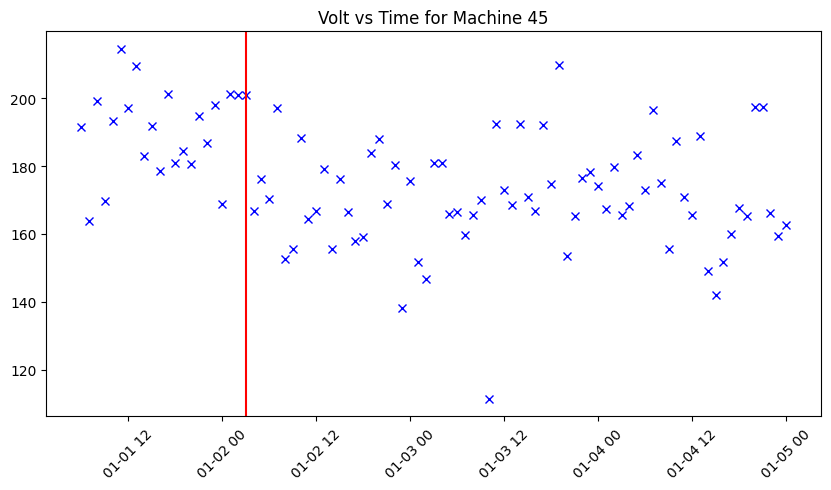

In [15]:
machine_id = 45
plt.rcParams['figure.figsize'] = [10, 5]
plt.title(f"Volt vs Time for Machine {machine_id}")
plt.plot(sample_t["datetime"].loc[sample_t["machineID"] == machine_id], sample_t["volt"].loc[sample_t["machineID"] == machine_id], "xb")
for t in failures["datetime"].loc[failures["machineID"] == machine_id]:
    plt.axvline(t, color="r")
plt.xticks(rotation = 45)
plt.show()